<a href="https://colab.research.google.com/github/ZlataGlazunova/homeworks/blob/main/kNN_hometask.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Задание

В рамках этого задания вам предстоить подобрать оптимальное число соседей для алгоритма kNN. Датасет здесь будет сгенерирован с помощью специальной функции datasets.make_classification из библиотеки scikit-learn. Часть кода уже написана, её рекомендуется не изменять, а только запустить код в ячейках. Собственно, вам требуется подобрать такое число соседей k, чтоб вы прошли валидацию в соответствующей ячейке "Валидация модели". Очень полезно будет, если вы посмотрите на питон-ноутбук, ссылка на который в конце конспекта к этому вебинару или же посмотрите на то, как подобное исследование проводит преподаватель на вебинаре. Успехов!

Код с вебинара: https://colab.research.google.com/drive/11oGsSE5vcSMdMkGmKRSqKhLEb4TEvwf3

# Импорт библиотек

In [1]:
!pip install scikit-plot
import scikitplot as skplt

In [2]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

# Работа с данными

In [3]:
hard_problem = datasets.make_classification(
    n_samples=100,
    n_features=100,
    n_informative=50,
    n_classes=3,
    n_redundant=50,
    n_clusters_per_class=1,
    random_state=42,
)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    *hard_problem,
    test_size=0.3,
    random_state=1,
)

# Обучение модели

Обучим модель с k=8:

In [5]:
clf = KNeighborsClassifier(n_neighbors=8)
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=8)

In [6]:
predictions = clf.predict(X_test)
accuracy_score(y_test, predictions)

0.6333333333333333

In [16]:
accs = []
ks = range(1, 30)
for k in ks:
  clf = KNeighborsClassifier(n_neighbors=k)
  clf.fit(X_train, y_train)
  pred = clf.predict(X_test)
  acc = accuracy_score(y_test, pred)
  accs.append(acc)
accs

[0.43333333333333335,
 0.6,
 0.6666666666666666,
 0.7,
 0.6,
 0.6333333333333333,
 0.6666666666666666,
 0.6333333333333333,
 0.7666666666666667,
 0.7,
 0.7333333333333333,
 0.7333333333333333,
 0.7,
 0.7666666666666667,
 0.7333333333333333,
 0.8333333333333334,
 0.8,
 0.8,
 0.7,
 0.6666666666666666,
 0.6333333333333333,
 0.7,
 0.7,
 0.6666666666666666,
 0.6666666666666666,
 0.6,
 0.6,
 0.6,
 0.5]

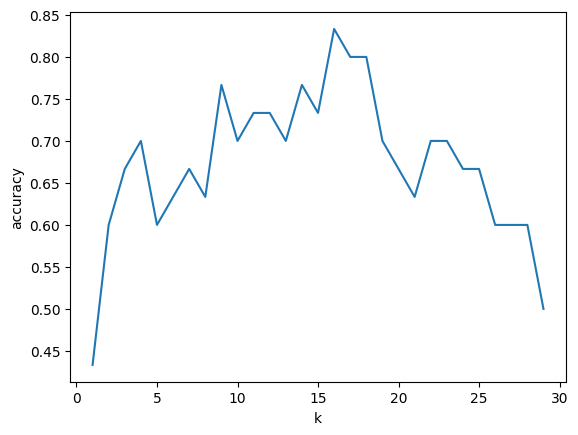

In [17]:
fig, ax = plt.subplots()
ax.plot(ks, accs)
ax.set(xlabel='k', ylabel='accuracy')
plt.show()

# Обучение модели с лучшим числом соседей k:

In [23]:
k_optim = 16# здесь введите ваше оптимальное значение k

In [24]:
clf = KNeighborsClassifier(n_neighbors=k_optim)
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=16)

In [25]:
y_pred = clf.predict(X_test)

# Валидация модели

In [26]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8333333333333334


In [27]:
print("Test accuracy: %.5f" % accuracy)
assert accuracy > 0.8, "попробуйте изменить следующие параметры: penalty, solver"

print('Хорошая работа!')

Test accuracy: 0.83333
Хорошая работа!


<Axes: title={'center': 'Normalized Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

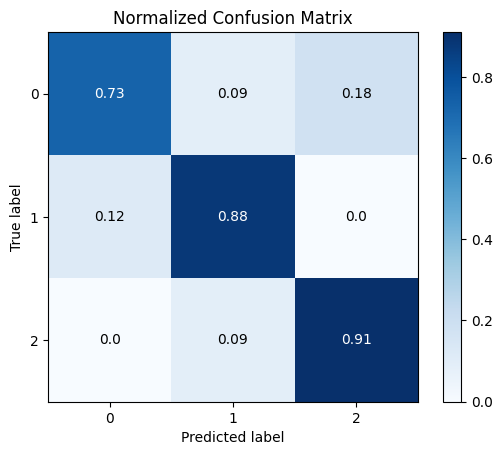

In [28]:
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True)

In [29]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.73      0.80        11
           1       0.78      0.88      0.82         8
           2       0.83      0.91      0.87        11

    accuracy                           0.83        30
   macro avg       0.83      0.84      0.83        30
weighted avg       0.84      0.83      0.83        30

